In [71]:
import pandas as pd
df = pd.read_csv('../dataset/bankloan.csv')
print(df.head())
print(df.dtypes)

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
ID                      int64
Age                     int64
Experience              int64
Inc

In [80]:
X = df.drop(['ID','ZIP.Code','Personal.Loan'], axis=1)  # Drop ID and ZIP.Code since they are identifiers
y = df['Personal.Loan']

In [81]:
print(type(X))  # should be <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Re-wrap in DataFrames if needed
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [84]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,-0.808210,-0.786533,1.815135,-0.360176,3.333974,-1.047111,0.584589,-0.34796,-0.258356,0.826742,1.553909
1,1.196007,1.300750,0.604271,1.365513,0.592282,0.149783,0.594593,-0.34796,-0.258356,0.826742,-0.643538
2,1.108867,1.126810,-0.671461,-0.360176,-0.207378,1.346677,-0.555852,-0.34796,-0.258356,0.826742,-0.643538
3,0.324608,0.257109,-0.130897,-1.223021,-0.264497,0.149783,-0.555852,-0.34796,-0.258356,-1.209568,-0.643538
4,-1.418188,-1.482294,0.128574,1.365513,-0.093141,0.149783,-0.555852,-0.34796,-0.258356,0.826742,1.553909


In [85]:
y_train.head()

2858    0
1559    1
1441    0
2179    0
1390    0
Name: Personal.Loan, dtype: int64

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.9540


In [87]:
#Logistic Regression with PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.18843364, 0.16701229, 0.12950184, 0.09374553, 0.09068041,
       0.08897847, 0.08290239, 0.08203309, 0.04580291, 0.03041692,
       0.00049249])

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set up features and target
X = df.drop(['CCAvg', 'Mortgage'], axis=1)
y = df['Mortgage']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Drop ID and ZIP.Code (optional, as they’re identifiers)
X_train = X_train.drop(['ID', 'ZIP.Code'], axis=1)
X_test = X_test.drop(['ID', 'ZIP.Code'], axis=1)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [120]:
X_train.head()

,Age,Experience,Income,Family,Education,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,-0.187887,-0.080307,0.759818,-1.211807,-1.050557,-0.338862,-0.346151,-0.248135,-1.245400,1.587806
1,-0.532950,-0.509757,-0.780207,0.473599,1.353463,-0.338862,-0.346151,-0.248135,0.802955,-0.629800
2,-0.015355,-0.080307,0.347699,-0.369104,0.151453,-0.338862,2.888909,-0.248135,0.802955,-0.629800
3,-0.705482,-0.681537,0.391080,-1.211807,-1.050557,-0.338862,2.888909,-0.248135,0.802955,-0.629800
4,0.933568,1.036263,0.282627,-0.369104,-1.050557,-0.338862,-0.346151,-0.248135,0.802955,-0.629800


In [121]:
y_train.head()

3344    0
114     0
1816    0
1594    0
957     0
Name: Mortgage, dtype: int64

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score for Mortgage: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score for Mortgage: 0.6845


In [127]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.2048325 , 0.17584979, 0.13100382, 0.11676841, 0.10488414,
       0.09532387, 0.08744822, 0.04753785, 0.03584115, 0.00051026])

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Set up features and target
X = df.drop(['Family','CreditCard'], axis=1)
y = df['CreditCard']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)
# Drop ID and ZIP.Code (optional, as they’re identifiers)
X_train = X_train.drop(['Age', 'Education'], axis=1)
X_test = X_test.drop(['Age', 'Education'], axis=1)
# Feature scaling (if needed)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [129]:
X_train.head()

,ID,Experience,Income,ZIP.Code,CCAvg,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online
0,0.589775,-0.080307,0.759818,-1.465304,0.781146,-0.558377,-0.338862,-0.346151,-0.248135,-1.245400
1,-1.639383,-0.509757,-0.780207,-0.487413,-0.831080,-0.558377,-0.338862,-0.346151,-0.248135,0.802955
2,-0.464761,-0.080307,0.347699,-0.476580,-0.163952,-0.558377,-0.338862,2.888909,-0.248135,0.802955
3,-0.617973,-0.681537,0.391080,-1.815406,0.447582,-0.558377,-0.338862,2.888909,-0.248135,0.802955
4,-1.057593,1.036263,0.282627,0.627325,-0.942268,-0.558377,-0.338862,-0.346151,-0.248135,0.802955


In [130]:
y_train.head()

3344    1
114     0
1816    0
1594    0
957     0
Name: CreditCard, dtype: int64

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score for CreditCard: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score for CreditCard: 0.7410


In [132]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 8


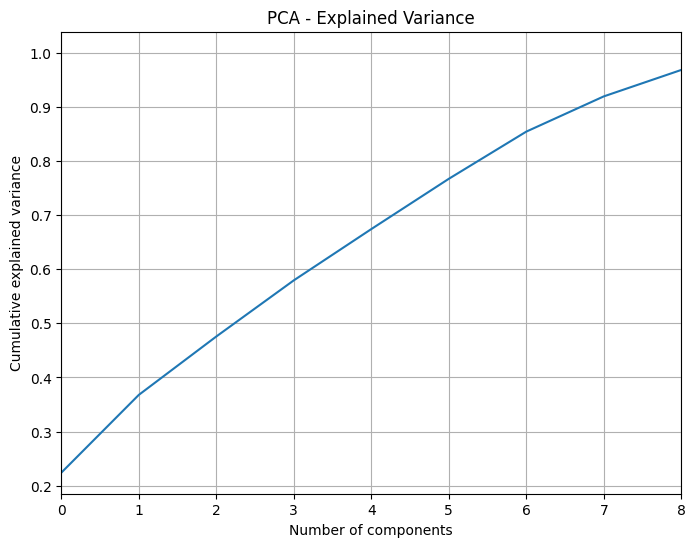

In [136]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 8)  # Corrected
plt.xticks(range(0, 9, 1))  # Optional: Set tick intervals from 0 to 8
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()